In [1]:
# DATA QUEST

In [3]:
pip install yfinance 

     ---------------------------------------- 63.0/63.0 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [51]:
import pandas as pd
import yfinance as yf

In [52]:
sp500 = yf.Ticker('^GSPC')

In [53]:
sp500 = sp500.history(period = 'max') # this will query through all the historical data from the beginning

In [54]:
sp500

# each row is the price on a trading day
# columns are opening price, the highest it hit, the lowest and the closing, and total volume 
# using these columns, we'll predict the price the next day

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-14 00:00:00-04:00,4514.609863,4527.759766,4499.560059,4505.419922,3647450000,0.0,0.0
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,0.0,0.0
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,0.0,0.0


In [55]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-07 00:00:00-04:00', '2023-07-10 00:00:00-04:00',
               '2023-07-11 00:00:00-04:00', '2023-07-12 00:00:00-04:00',
               '2023-07-13 00:00:00-04:00', '2023-07-14 00:00:00-04:00',
               '2023-07-17 00:00:00-04:00', '2023-07-18 00:00:00-04:00',
               '2023-07-19 00:00:00-04:00', '2023-07-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24002, freq=None)

In [56]:
# Cleaning and Visualizing Our Stock Market Data

<Axes: xlabel='Date'>

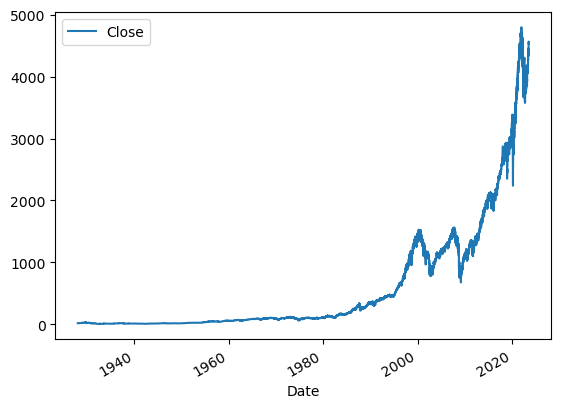

In [57]:
sp500.plot.line(y='Close', use_index = True)

In [58]:
del sp500['Dividends']
del sp500['Stock Splits']

In [59]:
# setting up our target for machine learning 

In [60]:
# can we predict the price will go up
sp500['Tomorrow'] = sp500['Close'].shift(-1)
# Created a Tomorrow column, and have the value of the closing price in the tomorrow column for one row up (shift -1)

In [61]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-07-14 00:00:00-04:00,4514.609863,4527.759766,4499.560059,4505.419922,3647450000,4522.790039
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,4554.979980
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,4565.720215


In [62]:
sp500['Target'] = (sp500['Tomorrow']>sp500['Close']).astype(int)

In [63]:
sp500

# 1 if True, so if price went up
# 0 if False, so if price went down

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-14 00:00:00-04:00,4514.609863,4527.759766,4499.560059,4505.419922,3647450000,4522.790039,1
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,4554.979980,1
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,4565.720215,1


In [67]:
# For greater accuracy in current events, well remove all data before 1990

sp500 = sp500.loc['1990-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-14 00:00:00-04:00,4514.609863,4527.759766,4499.560059,4505.419922,3647450000,4522.790039,1
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,4554.979980,1
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,4565.720215,1


In [75]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier - trains individual trees with random results and averages it 
# can pick up non linear tendancies

In [76]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = sp500.iloc[:-100] # start until final 100 rows
test = sp500.iloc[-100:] # start from final 100 to end

# split the data, and since it is time series, we'll have to split it off a certain data

In [80]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [82]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [83]:
preds = pd.Series(preds, index = test.index)

In [86]:
precision_score(test['Target'],preds) # precision of 58

0.5833333333333334

In [87]:
combined = pd.concat([test['Target'], preds], axis = 1)

<Axes: xlabel='Date'>

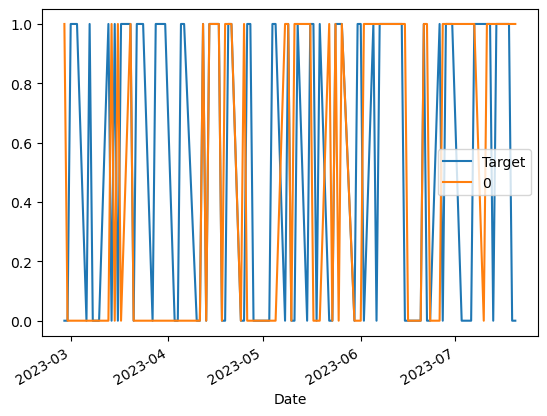

In [89]:
combined.plot()

In [100]:
# Building a back test system

def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis= 1)
    return combined


In [101]:
def backtest(data, model, predictors, start = 2500, step = 250):
    #training 10 years of data
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [103]:
predictions = backtest(sp500, model, predictors)

In [105]:
predictions['Predictions'].value_counts()

# We predicted the market would go down 3433 days and go up 2519 

0    3433
1    2519
Name: Predictions, dtype: int64

In [106]:
precision_score (predictions['Target'], predictions['Predictions'])

0.5299722111949187

In [110]:
#to compare, find days the market did go up

predictions['Target'].value_counts() / predictions.shape[0]

1    0.534106
0    0.465894
Name: Target, dtype: float64

In [111]:
## Adding additional predictors

In [114]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [115]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [118]:
sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14 00:00:00-04:00,4514.609863,4527.759766,4499.560059,4505.419922,3647450000,4522.790039,1,0.999488,1.0,1.008537,4.0,1.058002,32.0,1.117622,120.0,1.184298,532.0
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,4554.979980,1,1.001924,1.0,1.007318,4.0,1.060553,33.0,1.121161,121.0,1.188390,533.0
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,4565.720215,1,1.003546,2.0,1.009285,4.0,1.066329,34.0,1.128448,121.0,1.196367,533.0
